In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
housing = pd.read_csv('housing.csv')
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.shape

(20640, 10)

In [1]:
# so we have some null values in total_bedrooms feature but they are too less(less than 0.1%) so we can drop them

In [8]:
housing.dropna(inplace=True)

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
ocean_proximity       20433 non-null object
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [10]:
# let's do some stastical analysis with describe

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
# it seems that the data need to be scaled and also there could be many outliers present in some features  

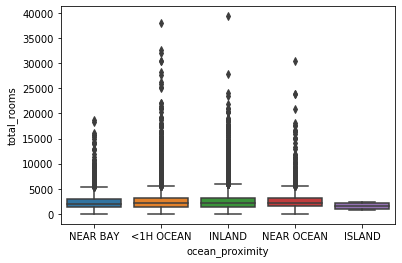

In [13]:
sns.boxplot(data=housing, x='ocean_proximity', y='total_rooms')

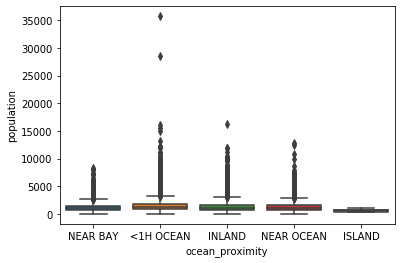

In [14]:
sns.boxplot(data=housing, x='ocean_proximity', y='population')

In [15]:
# boxplot and pairplot also confirms some outliers with some features these might be important so let's keep them as of now.

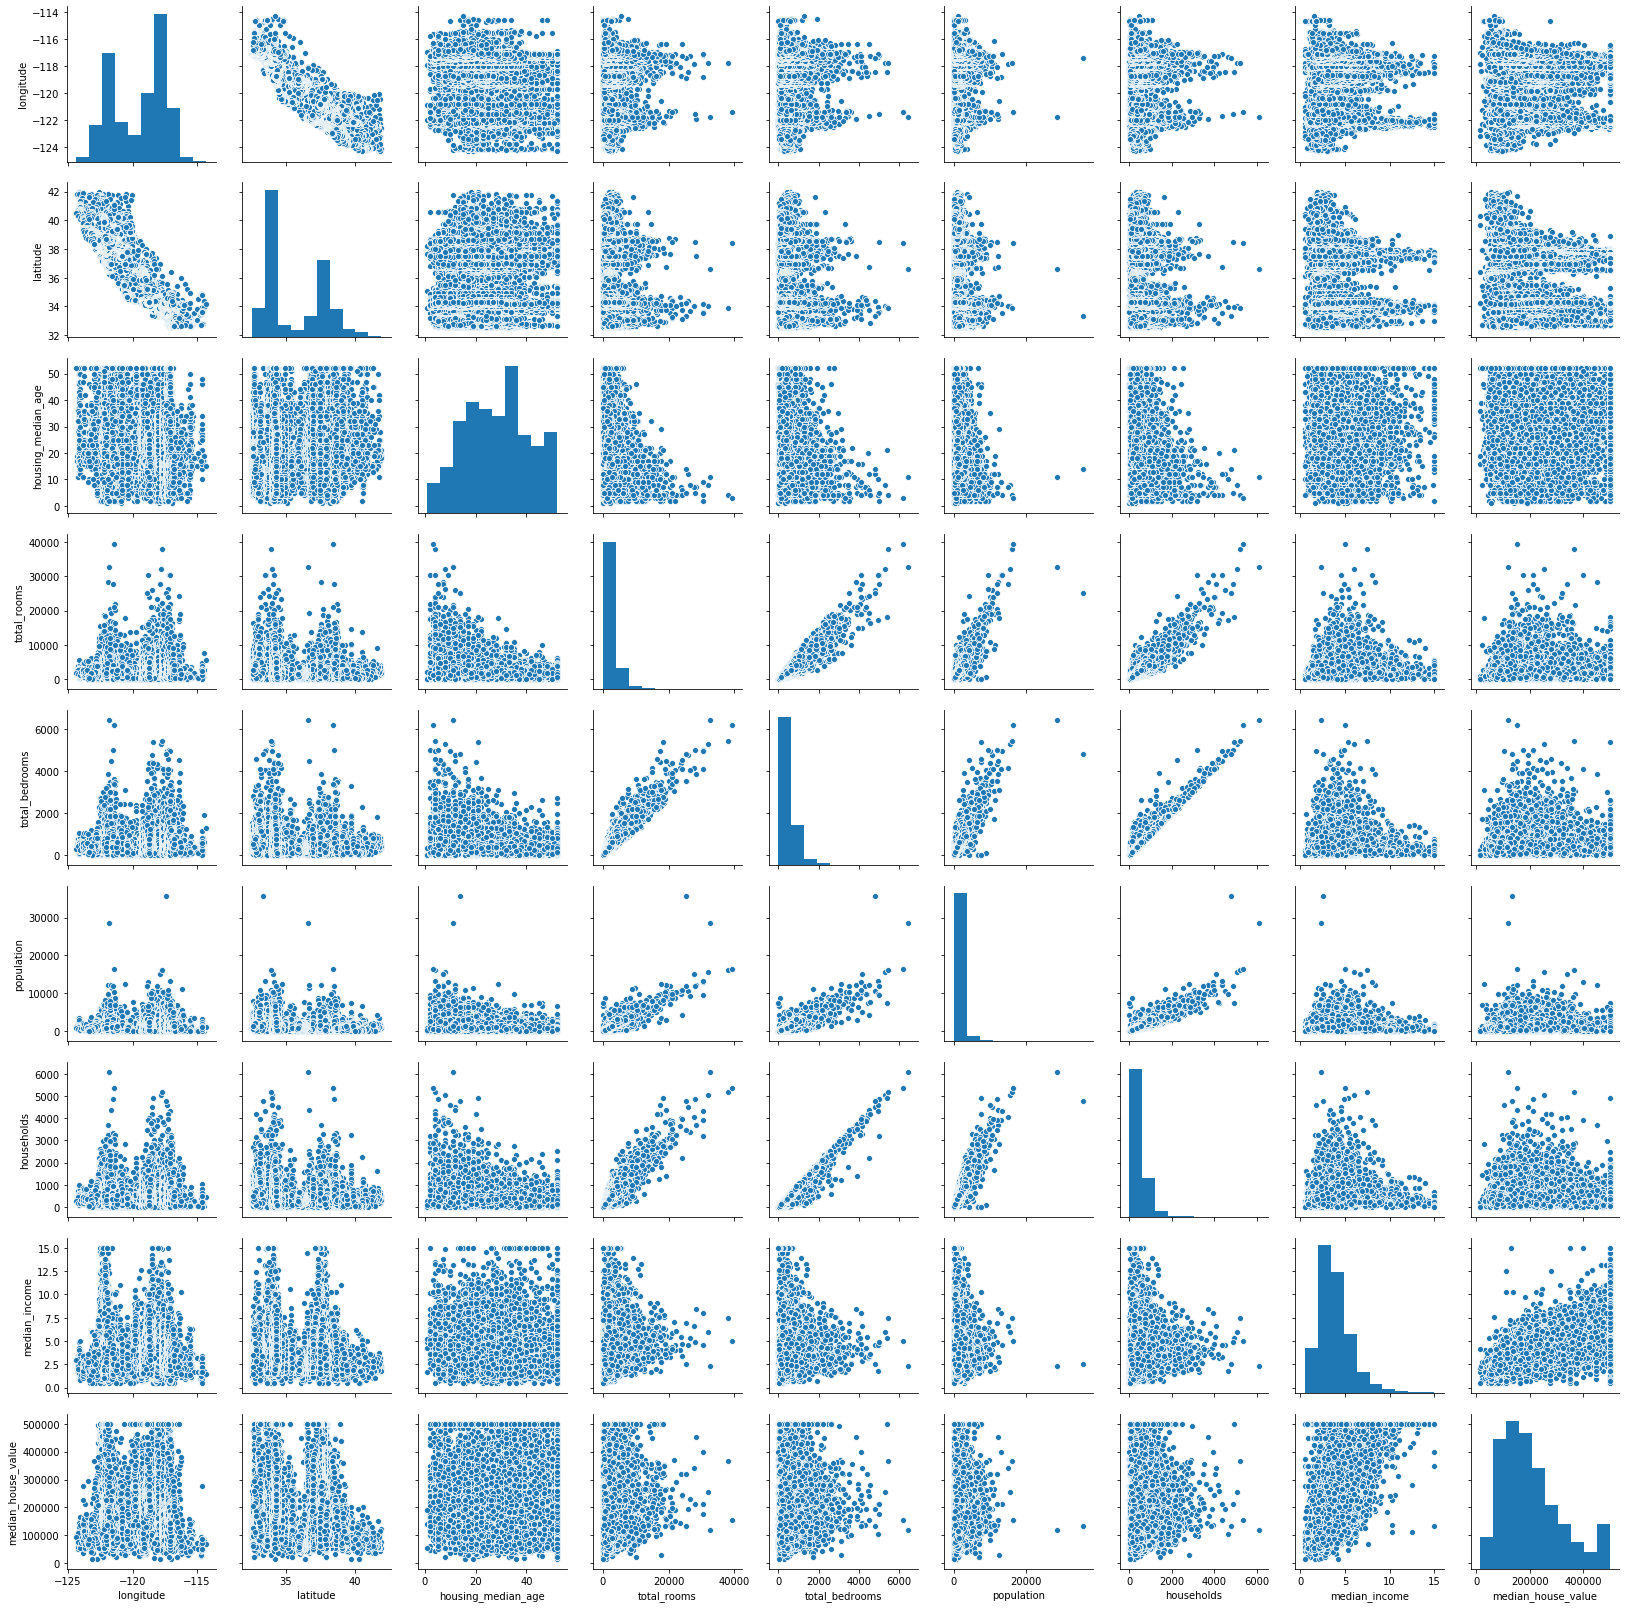

In [24]:
sns.pairplot(housing)

In [16]:
# from pairplot above we can get some intuition like
# our target doesn't form a mathematical polynomial relation with any of our features so let's first not to try LR models
# there are many features which could be highly correlated like households and total_bedroooms
# most of our features are not normally distributed
# also there is a dense line with label value nearly 500000

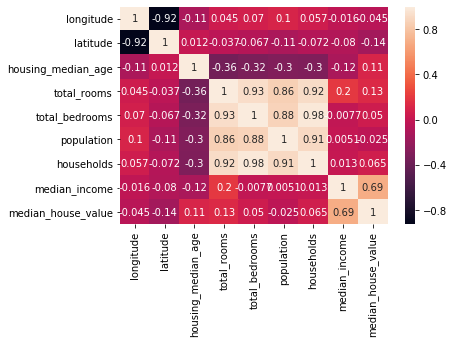

In [17]:
sns.heatmap(housing.corr(), annot = True)

In [18]:
# as intuted from pairplot many of the faetures are highly correlated and also except median_income not much of the features
# are nicely correlated with our target so let's try to create some more features to hopefuly better correlate with our 
#target.

In [19]:
housing['population_per_household'] = housing['population']/housing['households']

In [20]:
housing['total_rooms_per_household'] = housing['total_rooms']/housing['households']

In [21]:
# coz total_rooms and total_bedrooms are highly correlated so there is no sense to create total_bedrooms_per_households

In [22]:
housing['total_bedrooms_per_total_rooms'] = housing['total_bedrooms']/housing['total_rooms']

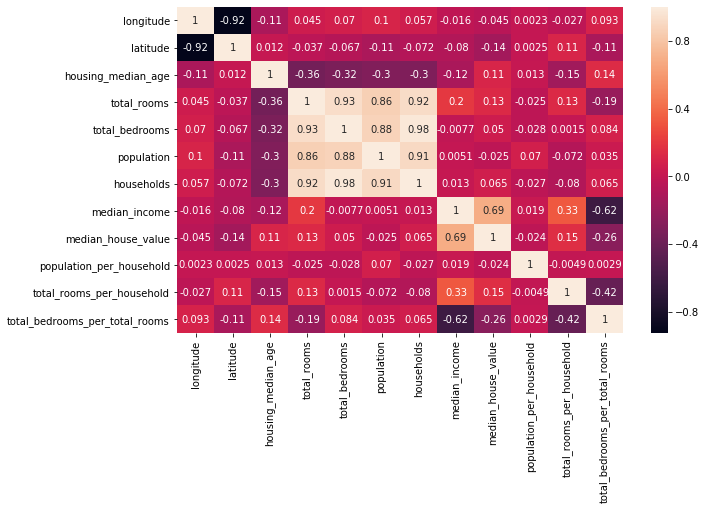

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(housing.corr(), annot = True)

In [24]:
# first of all any of our new features are not highly correlated with each other and also some of our new features are 
# correlated better than originals

In [25]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,population_per_household,total_rooms_per_household,total_bedrooms_per_total_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.555556,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.109842,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.802260,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.547945,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.181467,6.281853,0.172096


In [26]:
list1 = ['ocean_proximity']

In [27]:
housing = pd.get_dummies(housing, columns=list1, drop_first=True)

In [28]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,population_per_household,total_rooms_per_household,total_bedrooms_per_total_rooms,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2.555556,6.984127,0.146591,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2.109842,6.238137,0.155797,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2.802260,8.288136,0.129516,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2.547945,5.817352,0.184458,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2.181467,6.281853,0.172096,0,0,1,0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = housing.drop('median_house_value',axis=1)
y = housing['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# let's train our baseline model

In [32]:
from sklearn import metrics

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
m1 = DecisionTreeRegressor()

In [35]:
m1.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [36]:
m1.score(X_test,y_test)

0.6270400185165634

In [37]:
m1.score(X_train,y_train)

1.0

In [38]:
pr1 = m1.predict(X_test)

In [39]:
np.sqrt(metrics.mean_squared_error(y_test, pr1))

70511.73175493056

In [40]:
# highly overfit

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
m2 = RandomForestRegressor(n_estimators=50)

In [43]:
m2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [44]:
m2.score(X_train,y_train)

0.9728607399814906

In [45]:
m2.score(X_test,y_test)

0.8098912339414714

In [46]:
pr2 = m2.predict(X_test)

In [47]:
np.sqrt(metrics.mean_squared_error(y_test,pr2))

50342.10083140374

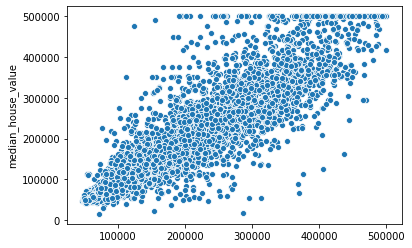

In [48]:
sns.scatterplot(x=pr2, y=y_test)

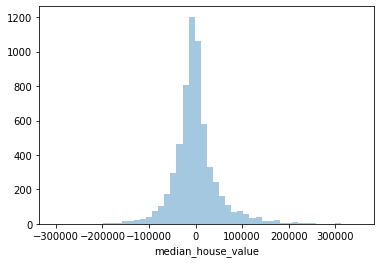

In [49]:
sns.distplot(y_test-pr2, kde=False)

In [50]:
# overfit is somewhat reduced  but the performance is still not satisfactory 
#let's try to optimise it using hyperparameter tuning

In [51]:
m2.feature_importances_

array([5.90803216e-02, 5.74622664e-02, 4.38487538e-02, 1.22927208e-02,
       1.09916107e-02, 1.18464674e-02, 1.03269060e-02, 4.76183285e-01,
       1.22393616e-01, 2.68957495e-02, 2.44082103e-02, 1.39971433e-01,
       2.28726601e-04, 1.03312846e-03, 3.03680481e-03])

In [52]:
feat = list(X.columns)

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
from pprint import pprint

In [56]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000]}


In [57]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [58]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 129.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [59]:
rf_random.best_params_

{'n_estimators': 230,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [60]:
best_random = rf_random.best_estimator_

In [67]:
best_random

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=60,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=230,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [61]:
best_random.score(X_train,y_train)

0.9944857007211113

In [62]:
best_random.score(X_test, y_test)

0.8235992960193811

In [78]:
# overfit is still there let's try to remove some least important features

In [63]:
pr3 = best_random.predict(X_test)

In [64]:
np.sqrt(metrics.mean_squared_error(y_test,pr3))

48493.15278169036

In [66]:
from sklearn.model_selection import cross_val_score

In [69]:
m = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=60,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=230,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
np.average(cross_val_score(m, X, y, cv=3))

0.6630464095664673

In [71]:
best_random.feature_importances_

array([9.22114935e-02, 8.70308894e-02, 4.23823813e-02, 2.42273395e-02,
       2.02572557e-02, 2.42245058e-02, 1.93521634e-02, 2.72497952e-01,
       9.50712792e-02, 6.92605221e-02, 9.53441739e-02, 1.45587946e-01,
       1.69768455e-04, 5.13373702e-03, 7.24859317e-03])

In [72]:
feat = list(X.columns)

In [77]:
importances = list(best_random.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feat, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: median_income        Importance: 0.27
Variable: ocean_proximity_INLAND Importance: 0.15
Variable: population_per_household Importance: 0.1
Variable: total_bedrooms_per_total_rooms Importance: 0.1
Variable: longitude            Importance: 0.09
Variable: latitude             Importance: 0.09
Variable: total_rooms_per_household Importance: 0.07
Variable: housing_median_age   Importance: 0.04
Variable: total_rooms          Importance: 0.02
Variable: total_bedrooms       Importance: 0.02
Variable: population           Importance: 0.02
Variable: households           Importance: 0.02
Variable: ocean_proximity_NEAR BAY Importance: 0.01
Variable: ocean_proximity_NEAR OCEAN Importance: 0.01
Variable: ocean_proximity_ISLAND Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

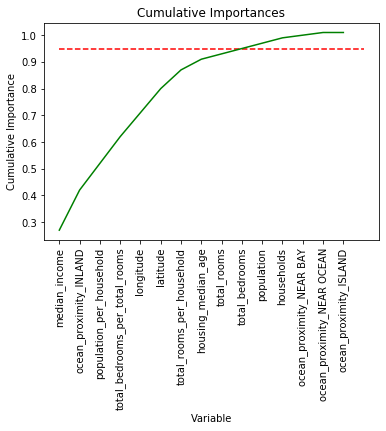

In [79]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(sorted_features, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(sorted_features, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [80]:
X_new = X[['median_income','ocean_proximity_INLAND','population_per_household','total_bedrooms_per_total_rooms',
           'longitude','latitude','total_rooms_per_household','housing_median_age','total_rooms','total_bedrooms']]

In [90]:
X_tr,X_te,y_tr,y_te = train_test_split(X_new,y,test_size=0.3)
rf_new = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=60,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=230,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
rf_new.fit(X_tr,y_tr)
pr4 = rf_new.predict(X_te)

In [91]:
rf_new.score(X_tr,y_tr)

0.9955341743440093

In [92]:
rf_new.score(X_te,y_te)

0.8371105469431402

In [94]:
M = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=60,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=230,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
np.average(cross_val_score(M, X_new, y, cv=3))

0.6569288755221075

In [95]:
np.sqrt(metrics.mean_squared_error(y_te,pr4))

47114.49669149115

In [97]:
from sklearn.model_selection import GridSearchCV

In [101]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [60],
    'max_features': [2, 5],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [3, 6],
    'n_estimators': [180, 200, 250]
}

In [102]:
rf = RandomForestRegressor()

In [103]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3,verbose = 3)
# Fit the grid search to the data
grid_search.fit(X_tr, y_tr)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=180 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=180, score=0.813, total=   9.4s
[CV] bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=180 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.3s remaining:    0.0s


[CV]  bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=180, score=0.805, total=   9.4s
[CV] bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=180 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.7s remaining:    0.0s


[CV]  bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=180, score=0.801, total=   9.4s
[CV] bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, score=0.813, total=  10.4s
[CV] bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, score=0.804, total=  10.5s
[CV] bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, score=0.805, total=  10.4s
[CV] bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=250 


[CV]  bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=250, score=0.801, total=  12.5s
[CV] bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=180 
[CV]  bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=180, score=0.809, total=   5.7s
[CV] bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=180 
[CV]  bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=180, score=0.800, total=   3.9s
[CV] bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=180 
[CV]  bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=180, score=0.797, total=  10.8s
[CV] bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=200 


[CV]  bootstrap=False, max_depth=60, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=200, score=0.802, total=  21.4s
[CV] bootstrap=False, max_depth=60, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=False, max_depth=60, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=250, score=0.821, total=  26.0s
[CV] bootstrap=False, max_depth=60, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=False, max_depth=60, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=250, score=0.804, total=  26.0s
[CV] bootstrap=False, max_depth=60, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=False, max_depth=60, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=250, score=0.804, total=  26.3s
[CV] bootstrap=False, max_depth=60, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=180 


[CV]  bootstrap=False, max_depth=60, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=180, score=0.804, total=  17.2s
[CV] bootstrap=False, max_depth=60, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  bootstrap=False, max_depth=60, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=200, score=0.820, total=  19.1s
[CV] bootstrap=False, max_depth=60, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  bootstrap=False, max_depth=60, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=200, score=0.802, total=  19.0s
[CV] bootstrap=False, max_depth=60, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  bootstrap=False, max_depth=60, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=200, score=0.804, total=  19.2s
[CV] bootstrap=False, max_depth=60, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=250 


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 28.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [False], 'max_dept

In [105]:
rf_new = grid_search.best_estimator_
pr5 = rf_new.predict(X_te)
np.sqrt(metrics.mean_squared_error(y_te,pr5))

47637.81837116209

In [106]:
rf_ = grid_search.best_estimator_
np.average(cross_val_score(rf_,X_new,y,cv=3))

0.6444791745809363

In [107]:
rf_new.score(X_te,y_te)

0.8334718791277949

In [108]:
rf_new.score(X_tr,y_tr)

0.9793564274834983